## t-SNE

In [48]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim import models
from gensim.models import KeyedVectors
from IPython.core.interactiveshell import InteractiveShell
from time import time

%matplotlib notebook
InteractiveShell.ast_node_interactivity = "all"

In [49]:
# load_pretrained_word_embeddings()
#    """downloads pre-trained Google News word2vec vectors into Gensim"""   
#    model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [50]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [51]:
print(f"{type(model)}, {len(model.vocab)}")

<class 'gensim.models.keyedvectors.Word2VecKeyedVectors'>, 3000000


In [52]:
len(model.vocab)

3000000

In [53]:
patent_vector = model['patent']
patent_vector.shape
print(patent_vector)

(300,)

[-0.15429688  0.234375    0.35546875  0.04858398  0.13085938  0.10742188
  0.06030273 -0.33007812  0.18066406 -0.10449219  0.27539062  0.13378906
 -0.08496094 -0.20703125 -0.31445312 -0.27148438  0.29882812  0.3046875
 -0.3125      0.05078125 -0.46679688  0.375       0.140625   -0.10498047
  0.07470703 -0.00927734  0.25585938 -0.203125    0.00201416  0.26367188
  0.40820312 -0.17089844  0.39257812 -0.04614258  0.29882812 -0.11865234
 -0.05322266 -0.06176758  0.29101562 -0.01037598 -0.16699219  0.2421875
  0.03295898 -0.05419922 -0.38867188  0.09472656  0.02929688 -0.15234375
  0.00092697 -0.11132812  0.45507812 -0.30273438  0.12792969 -0.30664062
  0.22753906 -0.11035156 -0.17578125 -0.515625    0.37695312 -0.20019531
 -0.06005859  0.01647949  0.12792969 -0.24121094 -0.359375    0.21972656
 -0.15136719 -0.09472656 -0.06982422 -0.26171875 -0.30859375 -0.09228516
  0.38671875 -0.3125     -0.390625    0.01953125  0.24902344 -0.06640625
  0.11230469  0.06298828 -0.13867188 -0.3359375  -0.0

In [54]:
# compute cosine similarity between simple mean of the projection weight vectors
# of the given words and the vectors for each word in the model

model.most_similar('patent' topn=100)

SyntaxError: invalid syntax (<ipython-input-54-55e0eb7ae264>, line 4)

In [ ]:
patent_most_similar = model.similar_by_word('patent', topn=100)

In [ ]:
model.get_vector('patent')

In [7]:
patent_neighbors = [i[0] for i in patent_most_similar]
patent_neighbors

['patents',
 'Patent',
 'Patents',
 "'###_patent",
 'Patent_Office',
 "'###_Patent",
 'patenting',
 'patent_infringement',
 'intellectual_property',
 'Patent_Application',
 'Patent_Nos._#,###,###',
 'USPTO',
 'Ariad_patent',
 "'###_patents",
 'patent_litigations',
 'Patent_Nos._#,###,###_#,###,###',
 'Patent_Number',
 'Lipitor_patent',
 'VirnetX_patents',
 'Kreutzer_Limmer_patent',
 'EP#######',
 'patent_litigation',
 'patent_infringement_suit',
 'Forgent_patent',
 'patent_EP#######',
 'Cabilly_patent',
 "'###_Patents",
 'patent_infringement_suits',
 'Patents_Nos.',
 'called_Microstructure_Chromatograph',
 'patent_infringement_lawsuits',
 'intellectual_property_rights',
 'alleging_patent_infringement',
 'Uniloc_patent',
 'patent_infringement_lawsuit',
 'Plavix_patent',
 'Mosaid_patents',
 'WARF_patents',
 'patented',
 'Trademark',
 'Power_Integrations_patents',
 'infringed_patents',
 'patentability',
 'Rambus_patents',
 '#,###,###_B2',
 'intellectualproperty',
 'i4i_patent',
 'Eolas_pa

In [8]:
def get_vectors_neighbors(words_list):
    vectors = []
    for word in patent_neighbors:
        vector = model[word]
        vectors.append(vector)
    return vectors

In [15]:
embeddings = get_vectors_neighbors(patent_neighbors)

#### gradient descent with `verbose`

In [106]:
reduced_embeds = TSNE(n_components=2, verbose=2).fit_transform(embeddings)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.001s...
[t-SNE] Computed neighbors for 100 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.990360
[t-SNE] Computed conditional probabilities in 0.010s
[t-SNE] Iteration 50: error = 59.4321098, gradient norm = 0.4857069 (50 iterations in 0.081s)
[t-SNE] Iteration 100: error = 56.7718430, gradient norm = 0.5482655 (50 iterations in 0.070s)


/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


[t-SNE] Iteration 150: error = 60.1176414, gradient norm = 0.5377172 (50 iterations in 0.072s)
[t-SNE] Iteration 200: error = 61.9588852, gradient norm = 0.5836921 (50 iterations in 0.075s)
[t-SNE] Iteration 250: error = 60.6447220, gradient norm = 0.4836810 (50 iterations in 0.068s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.644722
[t-SNE] Iteration 300: error = 1.1264086, gradient norm = 0.0073070 (50 iterations in 0.069s)
[t-SNE] Iteration 350: error = 1.1167883, gradient norm = 0.0025465 (50 iterations in 0.077s)
[t-SNE] Iteration 400: error = 0.9510175, gradient norm = 0.0013947 (50 iterations in 0.069s)
[t-SNE] Iteration 450: error = 1.0194410, gradient norm = 0.0034143 (50 iterations in 0.067s)
[t-SNE] Iteration 500: error = 0.9277920, gradient norm = 0.0013575 (50 iterations in 0.088s)
[t-SNE] Iteration 550: error = 0.7411913, gradient norm = 0.0013967 (50 iterations in 0.084s)
[t-SNE] Iteration 600: error = 0.6622375, gradient norm = 0.0005263 (50 i

In [12]:
len(model.vocab.keys())

3000000

In [104]:
reduced_embeds[:,0]

array([ 249.61855  ,  205.89366  ,  228.10066  , -180.44724  ,
       -146.38744  ,  117.58818  ,   38.60392  ,  134.47957  ,
         30.1341   ,  -99.91938  ,  131.55394  ,    7.06802  ,
         15.772685 , -212.0943   ,   13.5225525,  132.54866  ,
        116.11475  ,   50.891537 , -185.33437  ,   69.12559  ,
       -149.5392   ,  225.50212  ,  151.57973  ,  -55.063423 ,
       -118.73731  ,   19.78608  , -200.07042  ,  165.48848  ,
        122.299576 ,   12.443531 ,  153.26614  ,   16.096287 ,
       -246.64278  ,  -95.31436  ,  163.75897  ,   57.60609  ,
        -62.079327 , -109.874214 ,   58.931973 ,  -98.64182  ,
        116.801956 ,  191.26546  ,  316.01334  ,  173.48792  ,
        -71.79955  ,   26.390345 ,   98.23776  , -199.98277  ,
        288.6434   , -215.24413  ,  -77.049576 ,  -58.984966 ,
       -222.06732  ,  -89.35338  ,  -20.857927 ,  -87.4176   ,
        193.67928  ,   23.576406 ,   47.024456 ,  219.79408  ,
        170.47824  ,  -64.058655 ,  268.31638  ,    3.1

In [ ]:
# fit_transform "fits X into an embedded space and returns that transformed output"

In [ ]:
def display_tsne_2d(data, color=None):
    

<IPython.core.display.Javascript object>


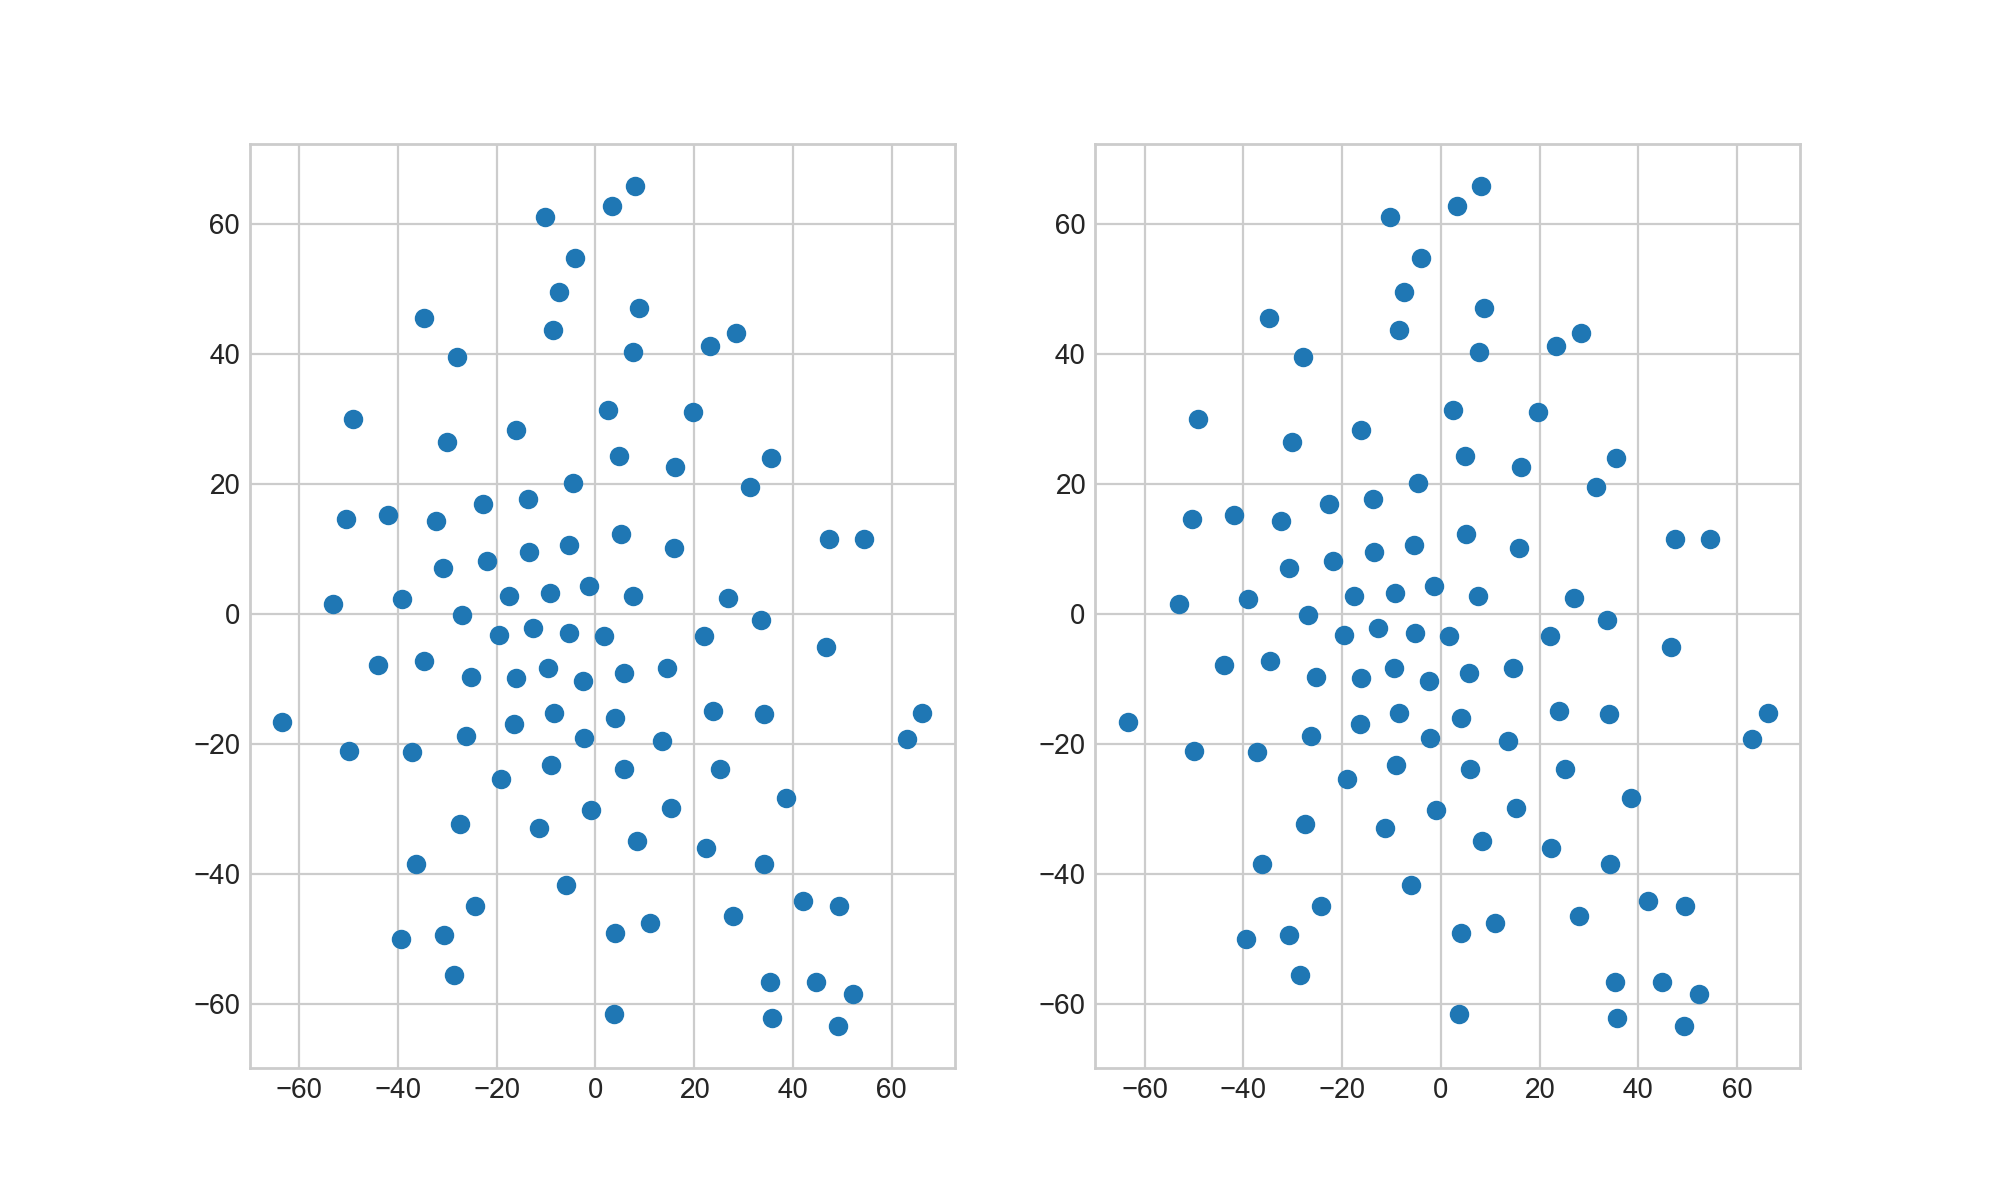

In [120]:
# def make_tsne_plot(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    # fig, ax = plt.subplots(figsize=(4, 1))
    # fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    # ax.axis('off')
    # ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    # fig.savefig('hello.png')
    # plt.close(fig)

#target_ids = range(len(digits.target_names))
# for i in range(5,50,5):
#colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
plt.style.use('seaborn-whitegrid')
#for index, color, label in zip(idxs, colors, )

# colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
#for embed, color, label in zip(embeds, labels, colors):
x = reduced_embeds[:, 0]
y = reduced_embeds[:, 1]

_ = ax[0].scatter(x, y)
_ = ax[1].scatter(x, y)
# plt.legend()
# plt.show()

#for i, c, label in zip(target_ids, colors, digits.target_names):
#    plt.scatter(reduced_embeds[y == i, 0], reduced_embeds[y == i, 1], c=c, label=label)
#plt.legend()
# plt.show()

In [59]:
len(range(5,50,5))

9

In [ ]:
perplexity
- "Getting the most from t-SNE may mean analyzing multiple plots with different perplexities."

In [58]:
perplexity :

SyntaxError: invalid syntax (<ipython-input-58-b8abd6fbb7fd>, line 1)

### playground

In [10]:
model.similarity('patent', 'intellectual_property')

0.640230787857788

In [ ]:
model.cosine_similarities

In [ ]:
# computes correlation of the model with human similarity judgments.
?model.evaluate_word_pairs

?model.accuracy

model.distances

# Access vectors for specific words with a keyed lookup:
len(model['customer'])

# see the shape of the vector (300,)
vector.shape

vocab = model.vocab.keys()

model.vectors[0]

In [ ]:
# import pylab as plt
# import seaborn as sns; sns.set()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')